<a href="https://colab.research.google.com/github/probml/probml-notebooks/blob/main/hbayes_maml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make figures for hierarchical Bayesian regression models


In [1]:
import graphviz

In [2]:
def create_node(
    dot,
    character,
    subscript="",
    superscript="",
    color="white",
    fill_color="white",
    fontcolor="black",
    is_greek_letter=False,
):
    label, index = "", ""
    if subscript != "" and superscript != "":
        label = f"<SUB>{subscript}</SUB><SUP>{superscript}</SUP>"
        index = f"{subscript}{superscript}"
    elif subscript != "":
        label = f"<SUB>{subscript}</SUB>"
        index = f"{subscript}"
    elif superscript != "":
        label = f"<SUP>{superscript}</SUP>"
        index = f"{superscript}"

    if is_greek_letter:
        dot.node(
            f"{character}{index}",
            f"<&{character};<FONT POINT-SIZE='12'>{label}</FONT>>",
            color=color,
            fontcolor=fontcolor,
        )
    else:
        dot.node(
            f"{character}{index}",
            f"<{character}<FONT POINT-SIZE='10'>{label}</FONT>>",
            style="filled",
            color=color,
            fillcolor=fill_color,
            fontcolor=fontcolor,
        )

In [3]:
def create_subgraph(
    dot, hidden, observable, subscript, superscript, name, label="", color="grey", bgcolor="white", edge_color="black"
):
    dot.edge(f"{hidden}{subscript}{superscript}", f"{observable}{subscript}{superscript}", style="invis")

    with dot.subgraph(name=name) as c:
        c.edge(label, f"{hidden}{subscript}{superscript}", style="invis")
        create_node(c, observable, subscript, superscript=superscript, color=obs_color, fill_color=obs_fill_color)
        c.edge(f"{observable}{subscript}{superscript}", f"{hidden}{subscript}{superscript}", color=edge_color)
        c.edge(f"{hidden}{subscript}{superscript}", f"{observable}{subscript}{superscript}", style="invis")
        c.attr(
            style="rounded",
            color=color,
            bgcolor=bgcolor,
            label=f"<<FONT POINT-SIZE='16'>{subscript.upper()}<SUP>{superscript}</SUP></FONT>>",
            fontcolor=color,
            labeljust="r",
            labelloc="b",
        )

In [4]:
def plot_cluster(dot, subscripts, superscript, subgraph_labels, subgraph_colors, theta_subscript=""):
    for k, (subscript, label, color) in enumerate(zip(subscripts, subgraph_labels, subgraph_colors)):
        if subscript == "N":
            create_node(
                dot, hidden, subscript=subscript, superscript=superscript, color=hid_color, fill_color=hid_fill_color
            )
        else:
            create_node(dot, hidden, subscript=subscript, superscript=superscript, color=hid_color)

        subgraph_name = f"cluster_{superscript}_{k}"
        dot.node(label, label, color="white", fontcolor=color)
        s = superscript if theta_subscript == "" else f"{theta_subscript}{superscript}"
        dot.edge(f"Theta{s}", f"{hidden}{subscript}{superscript}", color=edge_color)
        dot.edge(f"Theta{s}", f"{label}", style="invis")

        create_subgraph(
            dot,
            hidden,
            observable,
            subscript,
            superscript,
            subgraph_name,
            label=label,
            color=color,
            bgcolor="white",
            edge_color=edge_color,
        )

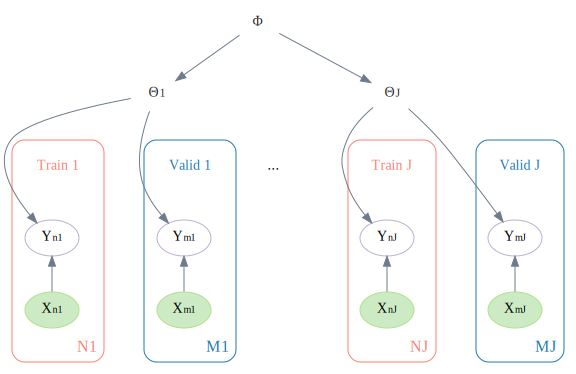

In [6]:
dot = graphviz.Digraph(format="pdf")


# superscripts = ['1', 'T']
superscripts = ["1", "J"]

train_subscript, test_subscript = "n", "m"
subscripts = [train_subscript, test_subscript]

# subgraph_labels = ['Train', 'Test']
subgraph_labels = ["Train", "Valid"]
subgraph_colors = ["/set34/4", "/paired3/2"]

edge_color = "lightsteelblue4"
fontcolor = "grey17"
hid_color, hid_fill_color = "/accent3/2", "lavender"
obs_color, obs_fill_color = "/paired3/3", "/pastel19/3"

param, hidden, observable = "Theta", "Y", "X"

dot.node("phi", "<&Phi;>", color="white", fontcolor=fontcolor)

for i, subscript in enumerate(superscripts):
    create_node(dot, param, subscript, color="white", fontcolor=fontcolor, is_greek_letter=True)
    dot.edge("phi", f"{param}{subscript}", color=edge_color)

for i, superscript in enumerate(superscripts):
    subgraph_labels = [f"Train {superscript}", f"Valid {superscript}"]
    plot_cluster(dot, subscripts, superscript, subgraph_labels, subgraph_colors)

    if i == 0:
        dot.node(f"blank{i}", "...", color="white")
        dot.edge(f"Theta{superscript}", f"blank{i}", style="invis")

file_name = "hbayes-maml"
dot.render(file_name, view=True)

dot